<a href="https://githubtocolab.com/gee-community/geemap/blob/master/docs/notebooks/152_extract_timeseries_to_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) if needed.

In [1]:
# %pip install -U geemap

## Import libraries

In [10]:
import matplotlib.pyplot as plt
import ee
import geemap

In [3]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Specify Latitude, Longitude, & Date

In [5]:
# Define the latitude and longitude
lat = 28.60
lon = 77.22

# Define time range
start_date = '2000-01-01'
end_date = '2015-12-31'

## Extract ERA5-Land Daily Timeseries

In [6]:
# Initialize image collection
image_collection = ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR")

# Define bands of interest (must match available band names exactly)
band_names = ['temperature_2m_min', 'temperature_2m_max', 'total_precipitation_sum']

# Define the scale
scale = 11132

# Extract time series at specified latitude and longitude
result = geemap.extract_timeseries_to_point(
    lat=lat,
    lon=lon,
    image_collection=image_collection,
    band_names=band_names,
    start_date=start_date,
    end_date=end_date,
    scale=scale
)

# Preview results
print(result.shape)
result.head()

(5843, 7)


,id,longitude,latitude,time,temperature_2m_min,temperature_2m_max,total_precipitation_sum
0,20000101,77.250353,28.550131,2000-01-01,279.505280,292.890305,0.000000e+00
1,20000102,77.250353,28.550131,2000-01-02,278.619492,293.037781,1.717619e-06
2,20000103,77.250353,28.550131,2000-01-03,279.319153,293.138153,4.410744e-07
3,20000104,77.250353,28.550131,2000-01-04,279.268143,292.862183,1.722592e-06
4,20000105,77.250353,28.550131,2000-01-05,278.394180,292.500854,2.997001e-06


## Extract CHIRPS Daily Precipitation Timeseries

In [7]:
# Initialize image collection
image_collection = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY")

# Define the band name
band_names = ['precipitation']

# Define the scale
scale = 5566

# Extract time series at specified latitude and longitude
result = geemap.extract_timeseries_to_point(
    lat=lat,
    lon=lon,
    image_collection=image_collection,
    band_names=band_names,
    start_date=start_date,
    end_date=end_date,
    scale=scale
)

# Preview results
print(result.shape)
result.head()

(5843, 5)


,id,longitude,latitude,time,precipitation
0,20000101,77.225353,28.575131,2000-01-01,0.0
1,20000102,77.225353,28.575131,2000-01-02,0.0
2,20000103,77.225353,28.575131,2000-01-03,0.0
3,20000104,77.225353,28.575131,2000-01-04,0.0
4,20000105,77.225353,28.575131,2000-01-05,0.0


## Extract MODIS Terra Vegetation Indices Timeseries

In [8]:
# Initialize image collection
image_collection = ee.ImageCollection("MODIS/061/MOD13Q1")

# Define the band names
band_names = ['NDVI', 'EVI']

# Define the scale
scale = 250

# Extract time series at specified latitude and longitude
result = geemap.extract_timeseries_to_point(
    lat=28.60,
    lon=77.22,
    image_collection=image_collection,
    band_names=band_names,
    start_date=start_date,
    end_date=end_date,
    scale=scale
)

# Preview results
print(result.shape)
result.head()

(365, 6)


,id,longitude,latitude,time,NDVI,EVI
0,2000_02_18,77.220305,28.59899,2000-02-18,4055,2106
1,2000_03_05,77.220305,28.59899,2000-03-05,3308,1939
2,2000_03_21,77.220305,28.59899,2000-03-21,3621,1867
3,2000_04_06,77.220305,28.59899,2000-04-06,4071,2375
4,2000_04_22,77.220305,28.59899,2000-04-22,3813,2501


## Plot the Timeseries

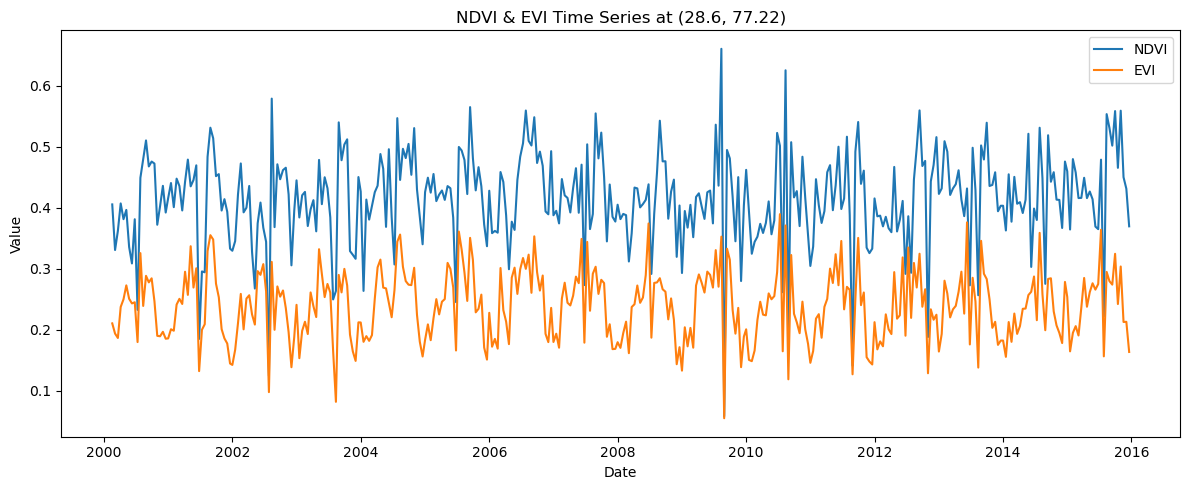

In [9]:
# Simple plot
plt.figure(figsize=(12, 5))

for band in ['NDVI', 'EVI']:
    plt.plot(result['time'], result[band] * 0.0001, label=band) # apply sacle factor of 0.0001

plt.title(f"NDVI & EVI Time Series at {lat, lon}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()